# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash;  30 баллов
* Задача 2 &mdash;  60 баллов
* Задача 3 &mdash;  60 баллов

*Примечение*: выполнение расчетов может занимать продолжительное время.

-----

In [ ]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm as tqdm
from scipy import integrate
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

sns.set_theme(font_scale=1.3, palette='Set2')
%matplotlib inline

## Задача 1

### **Профиль физика**

Загрузите данные с сайта курса. Проверьте, отличается ли распределение поперечного импульса `pT` $\pi^+$ (`id = 211`) и $\pi^-$ (`id = -211`) мюонов. Постройте гистограммы распределений и проведите t-test.
Сделайте выводы.

In [ ]:
df = pd.read_csv('pi.csv')
df.head()

In [ ]:
# ваш код

Объясните выбор теста и сделайте выводы.

**Вывод:**

### **Профиль биология**

Рассмотрим данные об экспрессии белка DYRK1_A в мышах в разные дни. Загрузите датасет с сайта курса. Постройте гистограммы распределений и проведите t-test, чтобы выяснить, различается ли средний уровень экспрессии белка в день 1 и 2.

In [ ]:
df = pd.read_csv('/content/mice_expression.csv')
df.head()

,MouseID,Day 1,Day 2
0,309_1,0.503644,0.579893
1,309_2,0.514617,0.305341
2,309_3,0.509183,0.972346
3,309_4,0.442107,0.527091
4,309_5,0.434940,0.517172


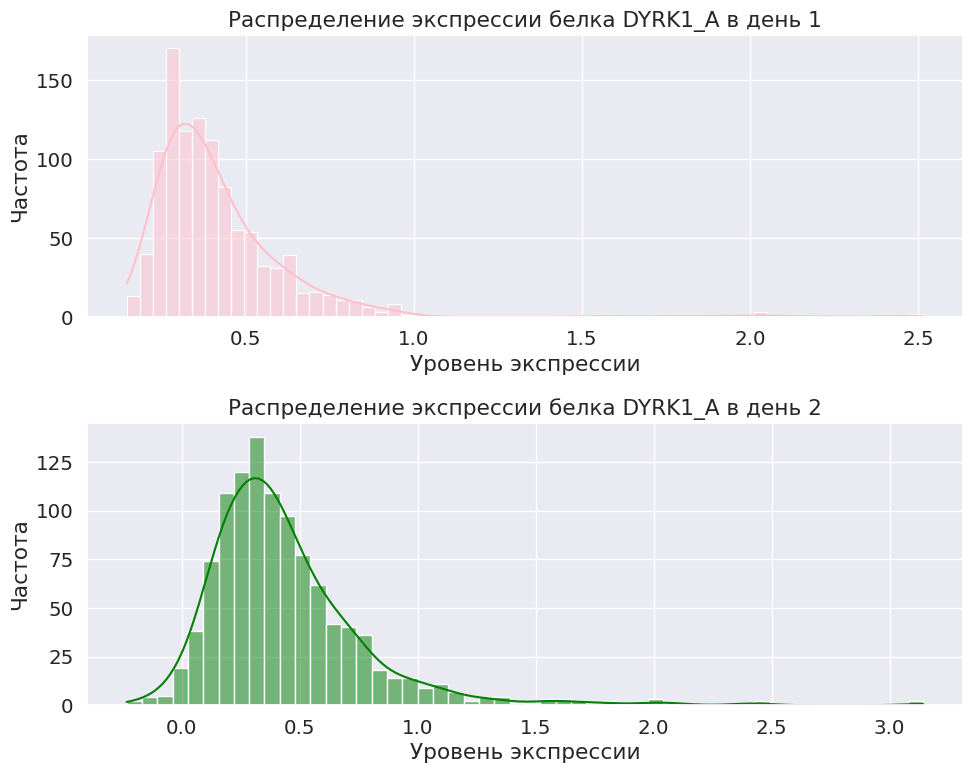

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
sns.histplot(df['Day 1'], kde=True, color='pink')
plt.title('Распределение экспрессии белка DYRK1_A в день 1')
plt.xlabel('Уровень экспрессии')
plt.ylabel('Частота')

plt.subplot(2, 1, 2)
sns.histplot(df['Day 2'], kde=True, color='green')
plt.title('Распределение экспрессии белка DYRK1_A в день 2')
plt.xlabel('Уровень экспрессии')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

распределение несимметричное, наибольшее значение около 0.5

In [ ]:
ttest_rel(df['Day 1'], df['Day 2'])

TtestResult(statistic=-2.1925908404058365, pvalue=0.028550423276649355, df=1076)

Объясните выбор теста и сделайте выводы.

**Вывод:** эти выборки связные, потому что элементы одной выборки связаны с другой.
также судя по гистограммам, распределения похожи на нормальные, хоть и с выбросами.
поэтому выбираем именно ttest_rel

## Задача 2


### **Профиль физика**


Как известно, в квантовой механике частицы можно разделить на две группы: бозоны (с целым спином) и фермионы (с полуцелым спином). Так как бозоны могут занимать одно и то же квантовое состояние, а фермионы не могут, то системы из нескольких таких частиц будут иметь различные распределения по энергиям:
$$
    n_\textbf{p}(\varepsilon) = \frac{1}{e^\frac{\varepsilon - \mu}{k_БT} \pm 1},
$$
где $\varepsilon$ &mdash; энергия частицы, $\mu$ &mdash; химический потенциал, а $n(\varepsilon)$ &mdash; среднее число частиц, находящихся в квантовом состоянии **p** с энергией $\varepsilon$. Знак "$+$" соответствует статистике для ферми-частиц (распределение Ферми-Дирака), "$-$" &mdash; статистике для бозе-частиц (распределение Бозе-Эйнштейна). Чтобы перейти к плотности вероятности по энергиям, необходимо учесть плотность состояний и не забыть про нормировочный множитель. Тогда

$$
    p(\varepsilon) = \frac{1}{Z}\frac{\sqrt{\varepsilon}}{e^\frac{\varepsilon - \mu}{k_БT} \pm 1},
$$
$$
    Z = \int \limits_0^\infty \frac{\sqrt{\varepsilon}}{e^\frac{\varepsilon - \mu}{k_БT} \pm 1} d\varepsilon
$$

Однако при высоких температурах идеальный газ из таких частиц будет иметь примерно одинаковое распределение, а именно больцмановское:
$$
    n_\textbf{p}(\varepsilon) = e^\frac{\mu - \varepsilon}{k_БT}
$$

В этой задаче вам предлагается посмотреть, как данный факт можно отследить при помощи t-test для независимых выборок. Иными словами, посмотреть как распределения энергий бозе- и ферми-газов отличаются статистически друг от друга при различных температурах.

Для наших целей разумно будет отказаться от размерных коэффициентов и договориться о следующем. Пусть $\varepsilon$ и $T$ &mdash; некие безразмерные величины, характеризующие энергию и температуру, а химический потенциал равен $\mu = -T \ln T$, что, в целом, недалеко от истины.

Зададим вид распределений

In [ ]:
P_f = lambda e, T: e**0.5 / (np.exp((e + T * np.log(T)) / T) + 1)
P_b = lambda e, T: e**0.5 / (np.exp((e + T * np.log(T)) / T) - 1)

Чтобы интеграл от плотности давал единицу, важно задать нормировочный множитель:

In [ ]:
T = 1.1

Z_f = integrate.quad(P_f, 0, 10 * T, args=(T))[0]
Z_b = integrate.quad(P_b, 0, 10 * T, args=(T))[0]

Визуализируем плотность вероятности:

In [ ]:
x_vals = np.linspace(0, 10 * T, 1000)
y_vals_f = P_f(x_vals, T)
y_vals_b = P_b(x_vals, T)
plt.figure(1)
plt.plot(x_vals, y_vals_f / Z_f, 'r', label='P_f(x)')
plt.plot(x_vals, y_vals_b / Z_b, 'b', label='P_b(x)')
plt.xlabel('Энергия, у. е.')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right', shadow=True)
plt.show()

Научимся генериовать выборки из интересующих нас распределений. Чтобы получить такие выборки воспользуемся алгоритмом Метрополиса-Гастингса.

In [ ]:
def sample_gas(T, P, steps=20000, sigma=3, cool_down=20):

    Q = lambda t1, t0: np.exp(-(t0)**2/(2 * (sigma * T)**2)/ \
        (np.sqrt(2 * np.pi) * (sigma * T)))

    Z = integrate.quad(P, 0, 100 * T, args=(T))[0]

    x0 = np.random.uniform(0, 2 * T)
    xt = x0

    samples = []

    for i in range(steps):
        xt_candidate = np.abs(np.random.normal(loc=xt, scale=sigma * T))

        accept_prob = (P(xt_candidate, T) * Q(xt, xt_candidate))/ \
            (P(xt, T) * Q(xt_candidate, xt))

        if np.random.uniform(0, 1) < accept_prob:
            xt = xt_candidate

        if i % cool_down == 0:
            samples.append(xt)

    burn_in = 1000 // cool_down

    samples = np.array(samples[burn_in:])

    return samples, Z

In [ ]:
samples_f, Z_f = sample_gas(T, P_f)
samples_b, Z_b = sample_gas(T, P_b)

In [ ]:
plt.hist(samples_f, bins=20, histtype='bar', facecolor='r', alpha=0.3, density=True, label='f')
plt.hist(samples_b, bins=20, histtype='bar', facecolor='b', alpha=0.3, density=True, label='b')
plt.plot(x_vals, y_vals_f/Z_f, 'r', label='P_f(x)')
plt.plot(x_vals, y_vals_b/Z_b, 'b', label='P_b(x)')
plt.xlabel('Энергия, у. е.')
plt.ylabel('Плотность вероятности')
plt.title('Metropolis Hastings sampling')
plt.legend(loc='upper right', shadow=True)
plt.show()


**1.**
Зафиксируйте значение "температуры" `T` и проведите несколько АА-тестов для выборок ферми-газа, чтобы убедиться в корректности работы нашего теста. Для этого 2000 раз сгенерируйте две выборки для ферми-газа и посчитайте p-value t-test независимых выборок.

In [ ]:
# ваш код

Вспомните, какое распределение имеет величина p-value в случае, если нулевая гипотеза верна?

**Ответ:**

Постройте гистограмму значений p-value. Корректно ли работает t-test на ваших данных?

In [ ]:
# ваш код

**Вывод:**

**2.** С помощью проведения AB-тестов узнайте, какова мощность критерия для разных значений "температуры" (постройте график). Для наглядности используйте логарифмическое разбиение шкалы "температуры" `np.logspace` и стройте график в логарифмическом масштабе

In [ ]:
Ts = np.logspace(0.001, 1, 20)

In [ ]:
# ваш код

**Вывод:**

### **Профиль биология**


Рассмотрим [данные по медицинским страховкам](https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv):

Скачайте файл с тренировочными данными и оставьте колонку:
* `charges` &mdash; стоимость страховки человека.

In [ ]:
df = pd.read_csv('/content/Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
charges = df['charges']
charges

,charges
0,3279.868550
1,21454.494239
2,1720.353700
3,6801.437542
4,11946.625900
...,...
3625,10987.324964
3626,11735.844352
3627,10602.385000
3628,8976.140452


Министерство здравоохранения хочет провести AB-тест для оценки значимости эффекта от новых рекомендаций по употреблению витаминов и использовать для этого t-test независимых выборок. Ожидается, что новые рекомендации повысят здоровье общества и снизят затраты на страховку. На время тестирования решено выдать рекомендации случайной группе из 1000 людей.

**1.**
Проведите 2000 случайных AA-тестов для проверки правильности работы t-test. Использовать нужно группы одинакого размера, конечно же, они не должны пересекаться.

In [ ]:
group_size = 1000
p_values = []

for i in range(2000):
    sample = charges.sample(n=group_size * 2, replace=False)
    control_group = sample.iloc[:group_size]
    test_group = sample.iloc[group_size:]
    t_stat, p_value = ttest_ind(control_group, test_group, equal_var=False)
    p_values.append(p_value)

Вспомните, какое распределение имеет величина p-value в случае, если нулевая гипотеза верна?

**Ответ:** $p(T(X)) \sim U[0, 1]$


Постройте гистограмму значений p-value. Корректно ли работает t-test на ваших данных?

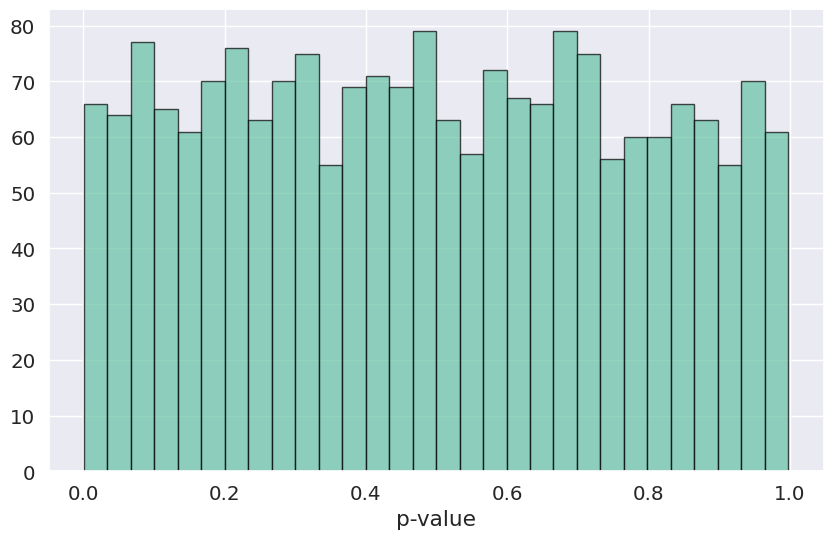

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('p-value')
plt.show()

**Вывод:** как и ожидалось, распределение равномерное, значит, t-test работает корректно. то есть при верной нулевой гипотезе любое значение p-value от 0 до 1 равновероятно.

**2.** Зафиксируйте две выборки одинакового размера: контрольную и тестовую. С помощью проведения AB-теста выясните, какова мощность теста для разных значений эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить отрицательное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого человека. Поясните, для чего это может быть полезно. Сделайте выводы.

In [ ]:
group_size = 1000
control_group = charges.sample(n=group_size, replace=False)
test_group = charges.drop(control_group.index).sample(n=group_size, replace=False)

def ab_test_with_shift(control_group, test_group, shift, noise_level=0.1):
    test_group_shifted = test_group + shift + sps.norm(loc=0, scale=1).rvs(size=1000)
    res = ttest_ind(control_group, test_group_shifted, equal_var=False)
    return res.pvalue

shifts = np.linspace(-300, -0.5, 5)
power = []

for shift in shifts:
    p_values = []
    n_reject = 0
    for i in range(2000):
        p_value = ab_test_with_shift(control_group, test_group, shift)
        p_values.append(p_value)
        print(p_value)
        if p_value < 0.05:
            n_reject += 1
    power.append(n_reject / 2000)

Выходные данные были обрезаны до нескольких последних строк (5000).
0.940358052683252
0.9403934489580184
0.9403550700981211
0.9404098123115755
0.940398920564522
0.940395082454891
0.9403791825882175
0.9403824132069436
0.9404050393989063
0.9403459001306775
0.9404344131692337
0.9403634545620747
0.9403593728249349
0.9405100169814565
0.9404130418417961
0.9403773248678344
0.9402972231362411
0.9403652156569382
0.9404161095021804
0.9403753857404651
0.9402788806636311
0.9403135002656451
0.9403565708142759
0.9403427642986444
0.9403775816455744
0.9404176190057647
0.9403896653259438
0.9403183014251253
0.9404698450180906
0.94039938666591
0.9404074348233618
0.9404172130558743
0.9403021095922344
0.940450864919111
0.9403662692290307
0.9403717705314887
0.9404197451981442
0.9403422225606882
0.9404649448680424
0.9403591579520211
0.9403121469267504
0.9404237146759662
0.9404443004002043
0.9404093841550946
0.9404090882969499
0.9404929177800863
0.9403966885184223
0.9402835918111121
0.9403688485297598
0.94035

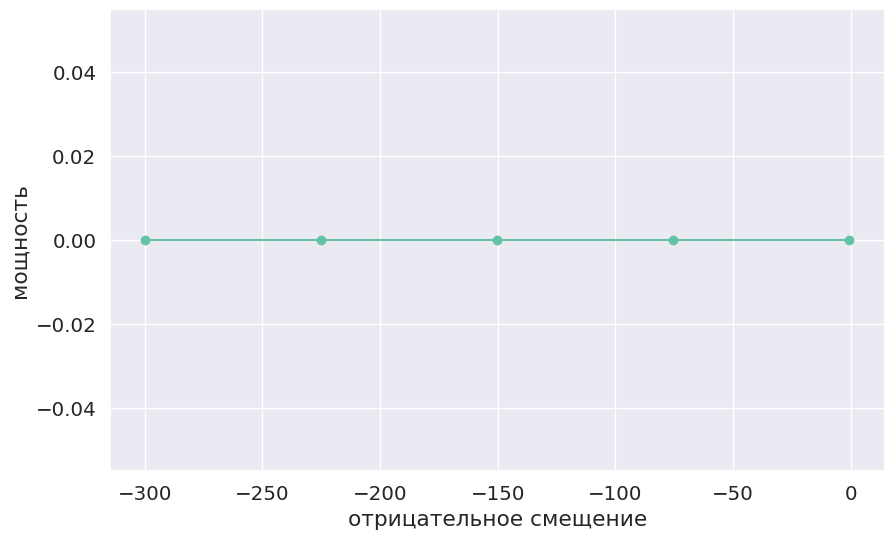

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(shifts, power, marker='o')
plt.xlabel('отрицательное смещение')
plt.ylabel('мощность')
plt.grid(True)
plt.show()

**Вывод:**

## Задача 3


### **Профиль физика**


Рассмотрим [данные о RGB (Red Giant Branch) и
HeB (Helium Burning) звездах](https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv):

Датасет содержит информацию о звездах, целевая переменная — класс звезд.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (звездами RGB и HeB). При возможности оцените также степень различия, в т.ч. доверительный интервал.

Скачайте файл и визуализируйте колонки (например, с помощью pairplot):
* `Dnu` &mdash; разделение мод с одинаковой степенью и последовательным порядком;
* `numax` &mdash; частота максимальной мощности колебаний;
* `epsilon` &mdash; расположение режима l=0 ;
* `Pop` &mdash; Population (0 = RGB, 1 = HeB)

In [ ]:
data = <...>

In [ ]:
<...> # визуализация

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия, сдвиг?

**Вывод:**

Оцените, по каким признакам различаются классы, степень различия (сдвиг) и доверительный интервал сдвига. В качестве доверительного интервала используйте бутстрепный квантильный. Объясните выбор статистического теста.

*Подсказка*: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://habr.com/ru/companies/avito/articles/709596/).

In [ ]:
def shift(x, y):
    '''Вычисление оценки параметра сдвига из критерия ранговых сумм Уилкоксона'''
    W = <...>
    return np.median(W)

def estimation(data, target, feature, p_values, shifts, ci_lefts, ci_rights, alpha=0.05):
    '''Вычисление оценки параметра сдвига, бутстрепного доверительного интервала для него, а также величины p-value.

    Аргументы:
    data -- pd.DataFrame данных эксперимента
    target -- название колонки, содержащей информацию о группе (A/B)
    feature -- название колонки с переменной, по которой проводим сравнение между группами
    p_values -- массив для сохранения величины p-value
    shifts -- массив для сохранения величины параметра сдвига
    ci_lefts -- массив для сохранения величины левой границы доверительного интервала
    ci_rights -- массив для сохранения величины правой границы доверительного интервала
    alpha -- уровень значимости
    '''
    x = <...>
    y = <...>

    p_values.append(<...>)

    shifts.append(shift(x, y))

    ci_bootst = <...> # бутстрепный доверительный интервал
    ci_lefts.append(ci_bootst[0])
    ci_rights.append(ci_bootst[1])


In [ ]:
p_values, shifts, ci_lefts, ci_rights = [], [], [], []
for column in tqdm(data.columns[1:]):
    estimation(<...>)

In [ ]:
results = {'feature': data.columns[1:],
           'p_value': p_values,
           'shift': shifts,
           'ci_left': ci_lefts,
           'ci_right': ci_rights}
results = pd.DataFrame(results)

In [ ]:
results

*Замечание.* Строго говоря, необходима поправка на множественное тестирование

Какой тест вы использовали и почему? Какие выводы можно сделать по p_value? Как доверительный интервал подтверждает эти выводы? Дополнительно: обратите внимание на `epsilon`: корректно ли оценивать сдвиг между распределениями по этой величине?

**Вывод:**

### **Профиль биология**


Рассмотрим [данные о расстройствах сна](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv):

Датасет содержит информацию об образе жизни людей, целевая переменная — есть ли у них расстройство сна.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (теми, у кого есть расстройство сна, и теми, у кого нет). При возможности оцените также степень различия, в т.ч. доверительный интервал.

Скачайте файл и оставьте колонки:
* `Age` &mdash; возраст;
* `Sleep Duration` &mdash; длительность сна;
* `Physical Activity Level` &mdash; уровень физической активности;
* `Heart Rate` &mdash; ЧСС;
* `Daily Steps` &mdash; число пройденных шагов в день;
* `Sleep Disorder` &mdash; целевая переменная.

In [ ]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
columns = ['Age', 'Sleep Duration', 'Physical Activity Level',
           'Heart Rate', 'Daily Steps', 'Sleep Disorder']

In [ ]:
data = data[columns]
data

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,NaN
1,28,6.2,60,75,10000,NaN
2,28,6.2,60,75,10000,NaN
3,28,5.9,30,85,3000,Sleep Apnea
4,28,5.9,30,85,3000,Sleep Apnea
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Sleep Apnea
370,59,8.0,75,68,7000,Sleep Apnea
371,59,8.1,75,68,7000,Sleep Apnea
372,59,8.1,75,68,7000,Sleep Apnea


Для упрощения задачи не будем рассматривать вид расстройства сна &mdash; только есть оно или нет.

In [ ]:
data['Sleep Disorder'].fillna('None', inplace=True)
dis = data.loc[:, 'Sleep Disorder'].copy()
dis[dis != 'None'] = 'Disorder'
data.loc[:, 'Sleep Disorder'] = dis
data

<ipython-input-15-bffcbfd92b60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sleep Disorder'].fillna('None', inplace=True)


,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,None
1,28,6.2,60,75,10000,None
2,28,6.2,60,75,10000,None
3,28,5.9,30,85,3000,Disorder
4,28,5.9,30,85,3000,Disorder
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Disorder
370,59,8.0,75,68,7000,Disorder
371,59,8.1,75,68,7000,Disorder
372,59,8.1,75,68,7000,Disorder


Визуализируйте распределение признаков при разных значениях целевой переменной (например, с помощью pairplot)

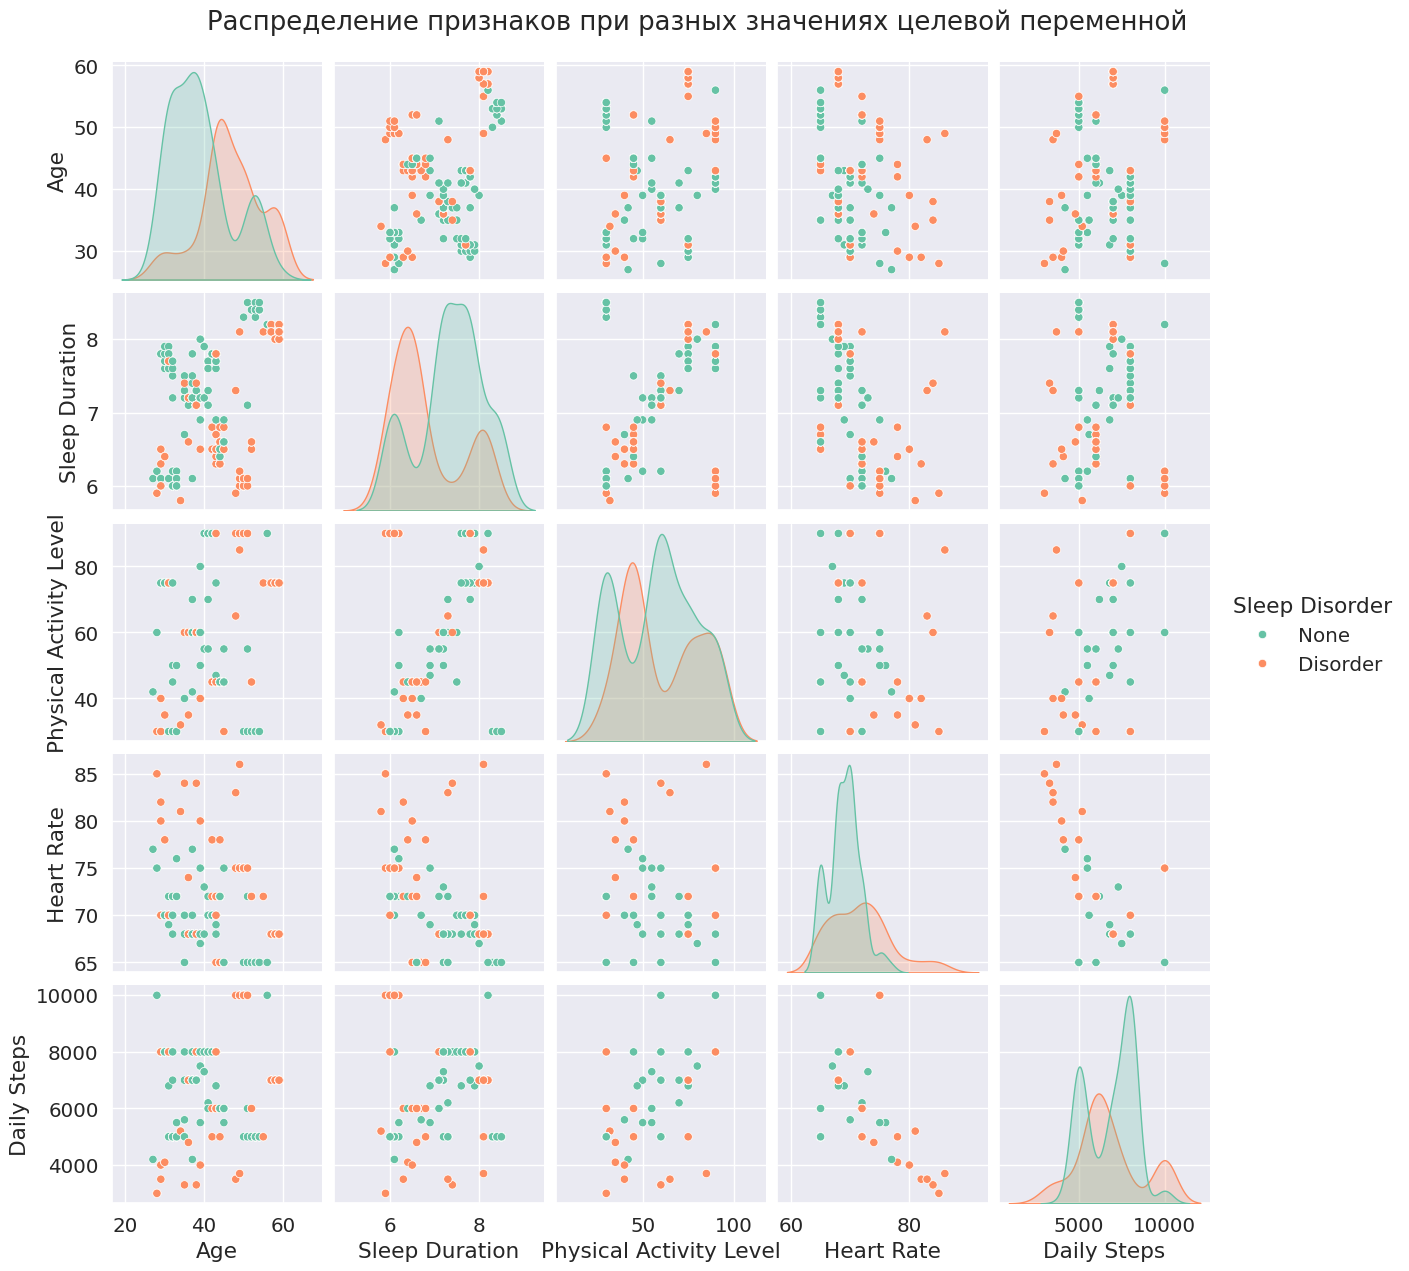

In [ ]:
sns.pairplot(data, hue='Sleep Disorder', diag_kind='kde')
plt.suptitle('Распределение признаков при разных значениях целевой переменной', y=1.02)
plt.show()

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия, сдвиг?

**Вывод:** для всех признаков распределение разное для разных классов.

распределение возраста для класса disorder смещено в сторону более старших возрастов.

sleep duration: у класса disorder наблюдается небольшой сдвиг в сторону меньшей продолжительности сна.

physical activity level:
распределения перекрываются, но у disorder сдвиг в сторону меньших значений уровня физической активности.

heart rate:
для класса disorder смещено в сторону более высоких значений частоты сердечных сокращений

daily steps:
распределение для класса disorder смещено в сторону меньшего количества шагов в день

Оцените, по каким признакам различаются классы, степень различия (сдвиг) и доверительный интервал сдвига. В качестве доверительного интервала используйте бутстрепный квантильный. Объясните выбор статистического теста.

*Подсказка*: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://https://habr.com/ru/companies/avito/articles/709596/).

In [ ]:
from scipy.stats import mannwhitneyu
def shift(x, y):
    '''Вычисление оценки параметра сдвига из критерия ранговых сумм Уилкоксона'''
    np.median(x) - np.median(y)
    return np.median(W)

def estimation(data, target, feature, p_values, shifts, ci_lefts, ci_rights, alpha=0.05):
    '''Вычисление оценки параметра сдвига, бутстрепного доверительного интервала для него, а также величины p-value.

    Аргументы:
    data -- pd.DataFrame данных эксперимента
    target -- название колонки, содержащей информацию о группе (A/B)
    feature -- название колонки с переменной, по которой проводим сравнение между группами
    p_values -- массив для сохранения величины p-value
    shifts -- массив для сохранения величины параметра сдвига
    ci_lefts -- массив для сохранения величины левой границы доверительного интервала
    ci_rights -- массив для сохранения величины правой границы доверительного интервала
    alpha -- уровень значимости
    '''
    x = data[data[target] == 'None'][feature]
    y = data[data[target] == 'Disorder'][feature]

    _, p_value = mannwhitneyu(x, y, alternative='two-sided')
    p_values.append(p_value)

    shifts.append(shift(x, y))

    ci_bootst = bootstrap_ci(np.concatenate([x, y]), alpha=alpha)
    ci_lefts.append(ci_bootst[0])
    ci_rights.append(ci_bootst[1])


In [ ]:
p_values, shifts, ci_lefts, ci_rights = [], [], [], []
for column in tqdm(columns[:-1]):
    estimation(data, 'Sleep Disorder', column, p_values, shifts, ci_lefts, ci_rights)

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'W' is not defined

In [ ]:
results = {'feature': columns[:-1],
           'p_value': p_values,
           'shift': shifts,
           'ci_left': ci_lefts,
           'ci_right': ci_rights}
results = pd.DataFrame(results)

In [ ]:
results

*Замечание.* Строго говоря, необходима поправка на множественное тестирование

Какой тест вы использовали и почему? Какие выводы можно сделать по p-value? Как доверительный интервал соотносится с этими выводами?

**Вывод:**